### Individual Assignment 

In [10]:
import yfinance as yf
import pandas as pd

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Open", "High", "Low", "Close"]]  # Select required columns

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file, index=False)
print(f"Data for {name} saved to {output_file}")


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price       Date         Open         High          Low        Close
0     2019-01-01  3746.713379  4109.020996  3400.819824  3457.792725
1     2019-02-01  3460.547119  4210.641602  3391.023682  3854.785400
2     2019-03-01  3853.757080  4296.806641  3733.749756  4105.404297
3     2019-04-01  4105.362305  5642.044434  4096.901367  5350.726562
4     2019-05-01  5350.914551  9008.314453  5347.645996  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv


In [11]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Open", "High", "Low", "Close"]]  # Select required columns

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file, index=False)
print(f"Data for {name} saved to {output_file}")

# Prepare data for OLS regression
# Using 'Close' as the dependent variable and 'Open', 'High', 'Low' as independent variables
X = data[["Open", "High", "Low"]]
y = data["Close"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print("OLS Regression Results:")
print(model.summary())


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price       Date         Open         High          Low        Close
0     2019-01-01  3746.713379  4109.020996  3400.819824  3457.792725
1     2019-02-01  3460.547119  4210.641602  3391.023682  3854.785400
2     2019-03-01  3853.757080  4296.806641  3733.749756  4105.404297
3     2019-04-01  4105.362305  5642.044434  4096.901367  5350.726562
4     2019-05-01  5350.914551  9008.314453  5347.645996  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv
Variance Inflation Factor (VIF):
  feature        VIF
0   const   3.162281
1    Open  28.303491
2    High  29.467061
3     Low  33.033620
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:             

In [15]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Open", "High", "Low", "Close"]]  # Select required columns

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file, index=False)
print(f"Data for {name} saved to {output_file}")

# Prepare data for OLS regression
# Using 'Close' as the dependent variable and 'Open', 'High', 'Low' as independent variables
X = data[["Open", "High", "Low"]]
y = data["Close"]

# Apply PCA to resolve multicollinearity
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X)

# Convert PCA components back to a DataFrame
X_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

# Add a constant for the OLS regression
X_pca = sm.add_constant(X_pca)

# Fit the OLS regression model
model = sm.OLS(y, X_pca).fit()

# Print the summary of the regression model
print("OLS Regression Results after PCA:")
print(model.summary())


[*********************100%***********************]  1 of 1 completed


Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price       Date         Open         High          Low        Close
0     2019-01-01  3746.713379  4109.020996  3400.819824  3457.792725
1     2019-02-01  3460.547119  4210.641602  3391.023682  3854.785400
2     2019-03-01  3853.757080  4296.806641  3733.749756  4105.404297
3     2019-04-01  4105.362305  5642.044434  4096.901367  5350.726562
4     2019-05-01  5350.914551  9008.314453  5347.645996  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv
OLS Regression Results after PCA:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          

In [14]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 15.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.1 MB 14.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Open", "High", "Low", "Close"]]  # Select required columns

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file, index=False)
print(f"Data for {name} saved to {output_file}")

# Prepare data for OLS regression
# Using 'Close' as the dependent variable and 'Open', 'High', 'Low' as independent variables
X = data[["Open", "High", "Low"]]
y = data["Close"]

# Standardize the features to reduce numerical instability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the standardized features
X_scaled = sm.add_constant(X_scaled)

# Fit the OLS regression model
model = sm.OLS(y, X_scaled).fit()

# Print the summary of the regression model
print("OLS Regression Results after Feature Scaling:")
print(model.summary())


[*********************100%***********************]  1 of 1 completed


Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price       Date         Open         High          Low        Close
0     2019-01-01  3746.713379  4109.020996  3400.819824  3457.792725
1     2019-02-01  3460.547119  4210.641602  3391.023682  3854.785400
2     2019-03-01  3853.757080  4296.806641  3733.749756  4105.404297
3     2019-04-01  4105.362305  5642.044434  4096.901367  5350.726562
4     2019-05-01  5350.914551  9008.314453  5347.645996  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv
OLS Regression Results after Feature Scaling:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2481.
Date:                Sun, 15 Dec 2024   Prob (F-statistic

In [ ]:
print("Variance Inflation Factor (VIF):")
print(vif_data)


In [ ]:
print(data[["Open", "High", "Low", "Close"]].corr())


In [2]:
# Check residuals for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extract residuals from the model
residuals = model.resid

# Durbin-Watson statistic
dw_stat = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Ljung-Box test for autocorrelation
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box)


Durbin-Watson statistic: 1.6283191470581488
Ljung-Box test results:
     lb_stat  lb_pvalue
10  8.527797   0.577424


Matplotlib is building the font cache; this may take a moment.


[*********************100%***********************]  1 of 1 completed
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inver

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price             Close
Date                   
2019-01-01  3457.792725
2019-02-01  3854.785400
2019-03-01  4105.404297
2019-04-01  5350.726562
2019-05-01  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -719.384
Date:                Mon, 16 Dec 2024   AIC                           1444.768
Time:                        11:09:30   BIC                           1451.514
Sample:                    02-01-2019   HQIC                          1447.448
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
            

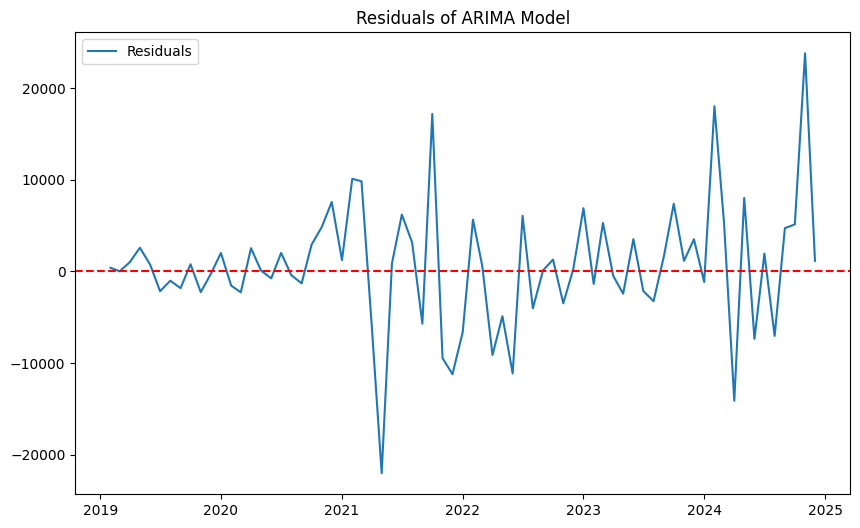

Ljung-Box test results:
     lb_stat  lb_pvalue
10  7.516634   0.675936


In [8]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Data for {name} saved to {output_file}")

# Apply ARIMA model to reduce autocorrelation
# Differencing the data to make it stationary
data_diff = data.diff().dropna()

# Fit ARIMA model (p, d, q) = (1, 1, 1) as an example
model = ARIMA(data_diff, order=(1, 1, 1))
results = model.fit()

# Print model summary
print("ARIMA Model Summary:")
print(results.summary())

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of ARIMA Model")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box)


In [7]:
pip install matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 6.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 6.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 6.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 6.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 6.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.0 MB/s eta 0:00:01
   ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price             Close
Date                   
2019-01-01  3457.792725
2019-02-01  3854.785400
2019-03-01  4105.404297
2019-04-01  5350.726562
2019-05-01  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv
Simplified ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -720.001
Date:                Mon, 16 Dec 2024   AIC                           1444.003
Time:                        11:18:52   BIC                           1448.500
Sample:                    02-01-2019   HQIC                          1445.789
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
 

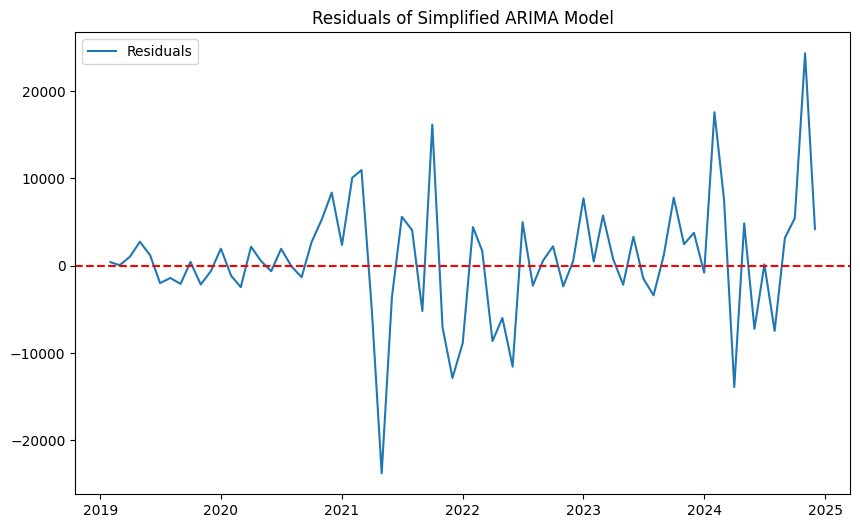

Ljung-Box test results:
     lb_stat  lb_pvalue
10  8.819139    0.54935


In [9]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Data for {name} saved to {output_file}")

# Apply simplified ARIMA model to reduce autocorrelation
# Differencing the data to make it stationary
data_diff = data.diff().dropna()

# Fit a simpler ARIMA model (p, d, q) = (0, 1, 1)
model = ARIMA(data_diff, order=(0, 1, 1))
results = model.fit()

# Print model summary
print("Simplified ARIMA Model Summary:")
print(results.summary())

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simplified ARIMA Model")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box)


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the data:
Price             Close
Date                   
2019-01-01  3457.792725
2019-02-01  3854.785400
2019-03-01  4105.404297
2019-04-01  5350.726562
2019-05-01  8574.501953
Data for Bitcoin saved to bitcoin_monthly_data_2019_2024.csv



c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simplified ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   71
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -719.993
Date:                Mon, 16 Dec 2024   AIC                           1443.986
Time:                        11:29:11   BIC                           1448.483
Sample:                    02-01-2019   HQIC                          1445.773
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9149      0.051    -17.806      0.000      -1.016      -0.814
sigma2      4.943e+07   9.17e-11   5.39e+17      0.000    4.94e+07    4.94e+07
Ljung-Box (L1) (Q): 

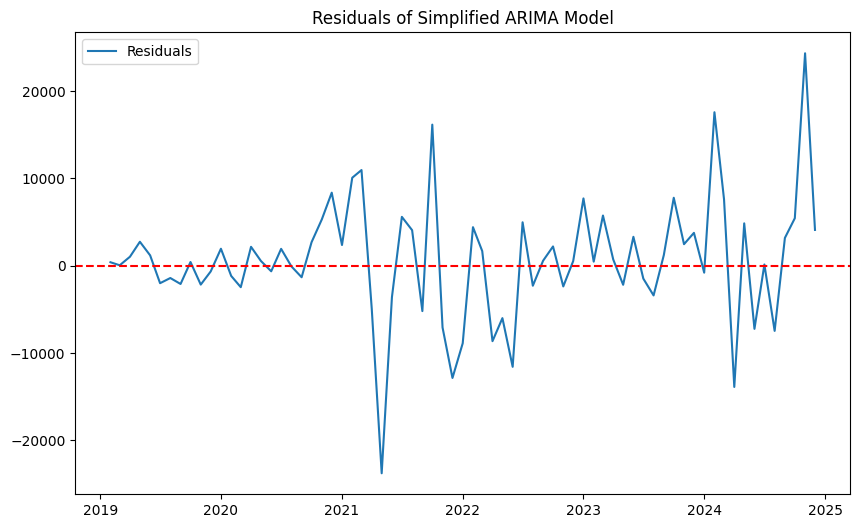

Ljung-Box test results:
     lb_stat  lb_pvalue
10  8.821234   0.549149


<Figure size 1000x600 with 0 Axes>

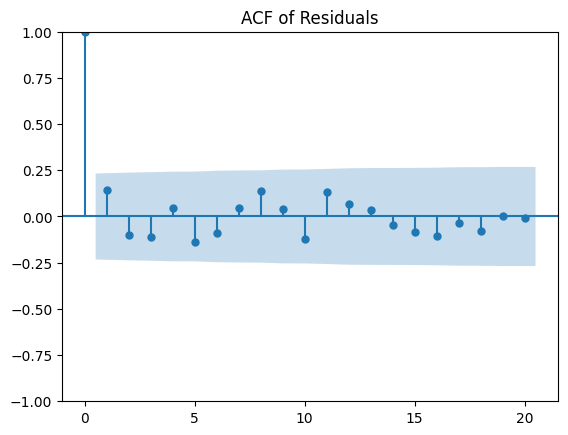

In [10]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Display the first few rows of the data
print("Preview of the data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_monthly_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Data for {name} saved to {output_file}")

# Apply simplified ARIMA model to reduce autocorrelation
# Differencing the data to make it stationary
data_diff = data.diff().dropna()

# Fit a simpler ARIMA model (p, d, q) = (0, 1, 1)
model = ARIMA(data_diff, order=(0, 1, 1))
results = model.fit()

# Print model summary
print("Simplified ARIMA Model Summary:")
print(results.summary())

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simplified ARIMA Model")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, title="ACF of Residuals")
plt.show()


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv



c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simplified ARIMA Model Summary (Log-Transformed):
                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                   71
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  14.461
Date:                Mon, 16 Dec 2024   AIC                            -24.923
Time:                        11:34:10   BIC                            -20.426
Sample:                    02-01-2019   HQIC                           -23.137
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9977      0.585     -1.705      0.088      -2.144       0.149
sigma2         0.0365      0.021      1.745      0.081      -0.005       0.078
Lj

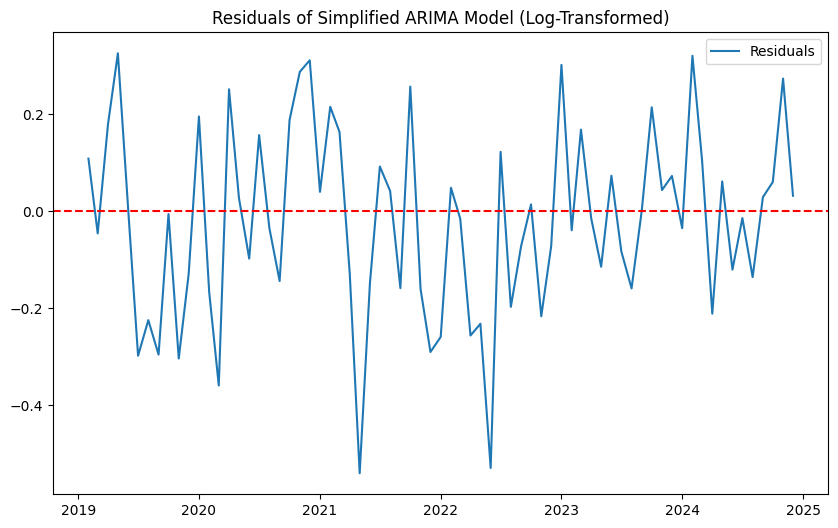

Ljung-Box test results (Log-Transformed):
    lb_stat  lb_pvalue
10   7.5159   0.676007


<Figure size 1000x600 with 0 Axes>

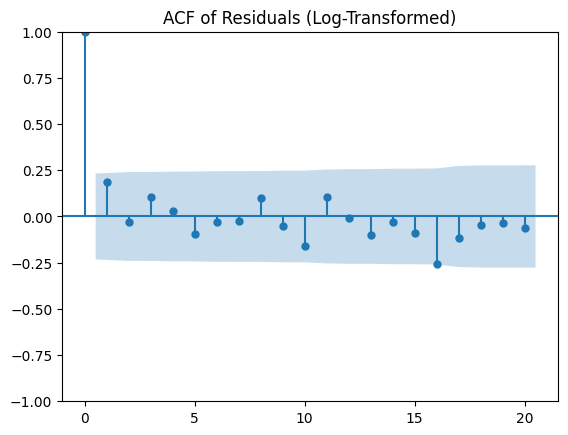

In [12]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data["Log_Close"] = data["Close"].apply(lambda x: np.log(x) if x > 0 else None)

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Differencing the log-transformed data to make it stationary
data_diff = data["Log_Close"].diff().dropna()

# Fit a simpler ARIMA model (p, d, q) = (0, 1, 1)
model = ARIMA(data_diff, order=(0, 1, 1))
results = model.fit()

# Print model summary
print("Simplified ARIMA Model Summary (Log-Transformed):")
print(results.summary())

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simplified ARIMA Model (Log-Transformed)")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results (Log-Transformed):")
print(ljung_box)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, title="ACF of Residuals (Log-Transformed)")
plt.show()


[*********************100%***********************]  1 of 1 completed
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv
Simplified ARIMA Model Summary (Log-Transformed):
                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                   71
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  14.463
Date:                Mon, 16 Dec 2024   AIC                            -24.926
Time:                        11:39:34   BIC                            -20.429
Sample:                    02-01-2019   HQIC                           -23.140
                        

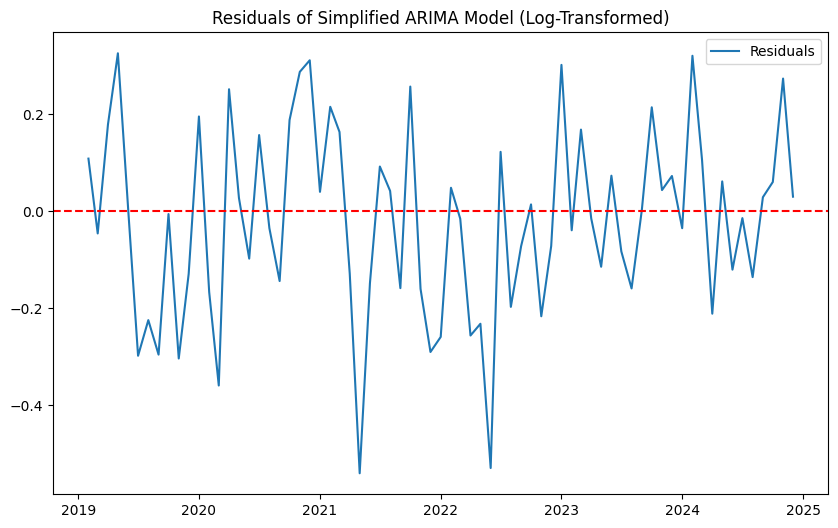

Ljung-Box test results (Log-Transformed):
     lb_stat  lb_pvalue
10  7.520962   0.675516


<Figure size 1000x600 with 0 Axes>

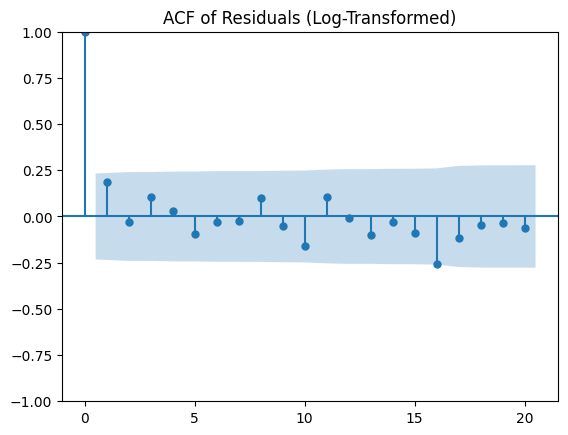

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03786. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1001604866.7539353
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1511522132.5923853
Iteration:      3,   Func. Count:     22,   Neg. LLF: -16.073429554305214
Iteration:      4,   Func. Count:     27,   Neg. LLF: -5.242949332339849
Iteration:      5,   Func. Count:     34,   Neg. LLF: -16.20307614095057
Iteration:      6,   Func. Count:     39,   Neg. LLF: 475162838.3290456
Iteration:      7,   Func. Count:     48,   Neg. LLF: 290.18024410431644
Iteration:      8,   Func. Count:     57,   Neg. LLF: -16.204527386435522
Iteration:      9,   Func. Count:     62,   Neg. LLF: -16.204392765258504
Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.204527389196
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 9
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   N

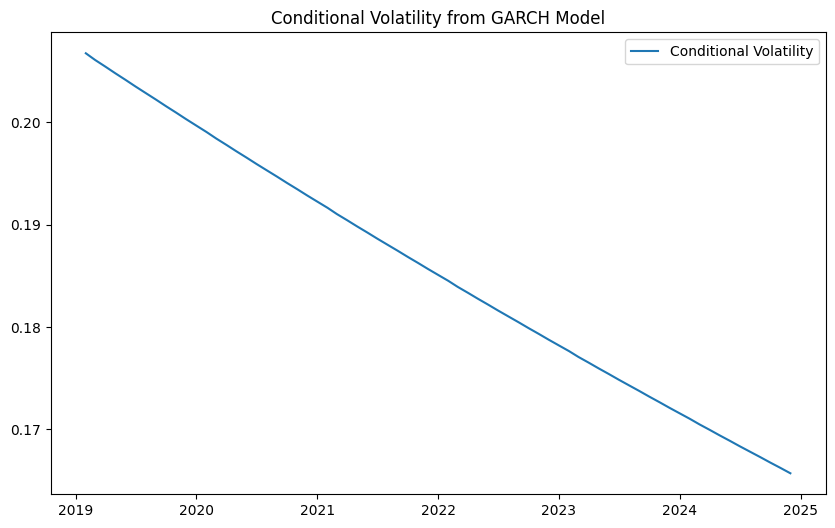

In [15]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data["Log_Close"] = data["Close"].apply(lambda x: np.log(x) if x > 0 else None)

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Differencing the log-transformed data to make it stationary
data_diff = data["Log_Close"].diff().dropna()

# Fit a simpler ARIMA model (p, d, q) = (0, 1, 1)
model = ARIMA(data_diff, order=(0, 1, 1))
results = model.fit()

# Print model summary
print("Simplified ARIMA Model Summary (Log-Transformed):")
print(results.summary())

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simplified ARIMA Model (Log-Transformed)")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results (Log-Transformed):")
print(ljung_box)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, title="ACF of Residuals (Log-Transformed)")
plt.show()

# Fit a GARCH model to check for heteroskedasticity
garch_model = arch_model(residuals, vol="Garch", p=1, q=1)
garch_results = garch_model.fit()

# Print GARCH model summary
print("GARCH Model Summary:")
print(garch_results.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_results.conditional_volatility, label="Conditional Volatility")
plt.title("Conditional Volatility from GARCH Model")
plt.legend()
plt.show()


In [14]:
pip install arch


   ---------------------------------------- 0.0/925.2 kB ? eta -:--:--
   ---------------------------------------- 925.2/925.2 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv



c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simplified ARIMA Model Summary (Log-Transformed):
                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                   71
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  14.464
Date:                Mon, 16 Dec 2024   AIC                            -24.929
Time:                        11:46:13   BIC                            -20.432
Sample:                    02-01-2019   HQIC                           -23.142
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9966      0.388     -2.566      0.010      -1.758      -0.235
sigma2         0.0365      0.014      2.566      0.010       0.009       0.064
Lj

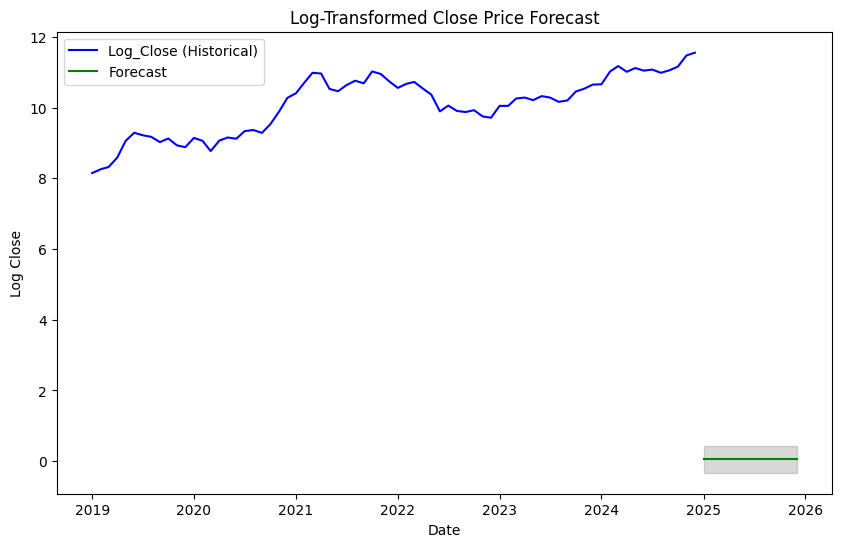

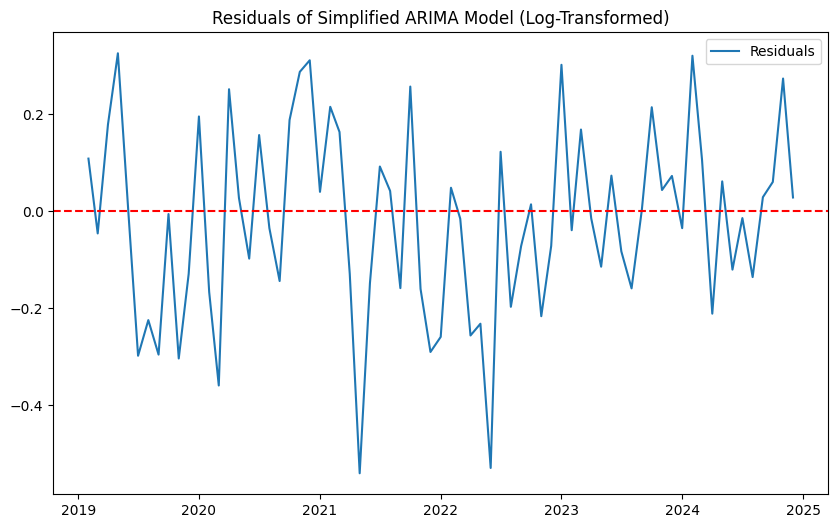

Ljung-Box test results (Log-Transformed):
     lb_stat  lb_pvalue
10  7.524858   0.675138


<Figure size 1000x600 with 0 Axes>

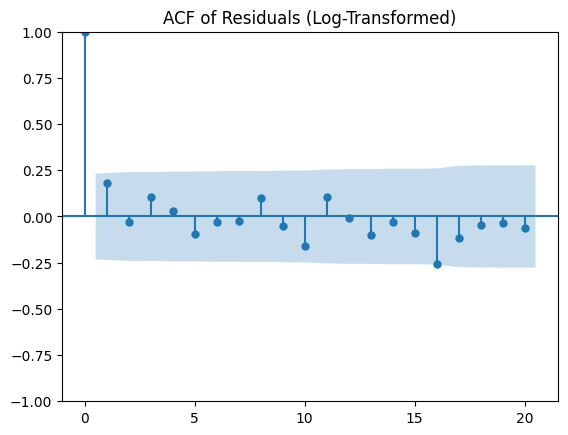

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03786. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1004692290.8819433
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1506796774.3601599
Iteration:      3,   Func. Count:     22,   Neg. LLF: -16.074430939380214
Iteration:      4,   Func. Count:     27,   Neg. LLF: -5.205563265364203
Iteration:      5,   Func. Count:     34,   Neg. LLF: -16.202315517933776
Iteration:      6,   Func. Count:     39,   Neg. LLF: 402744277.6475117
Iteration:      7,   Func. Count:     48,   Neg. LLF: 270.62121131754185
Iteration:      8,   Func. Count:     57,   Neg. LLF: -16.205568260372385
Iteration:      9,   Func. Count:     62,   Neg. LLF: -15.19599299476141
Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.205568264567756
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 9
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 

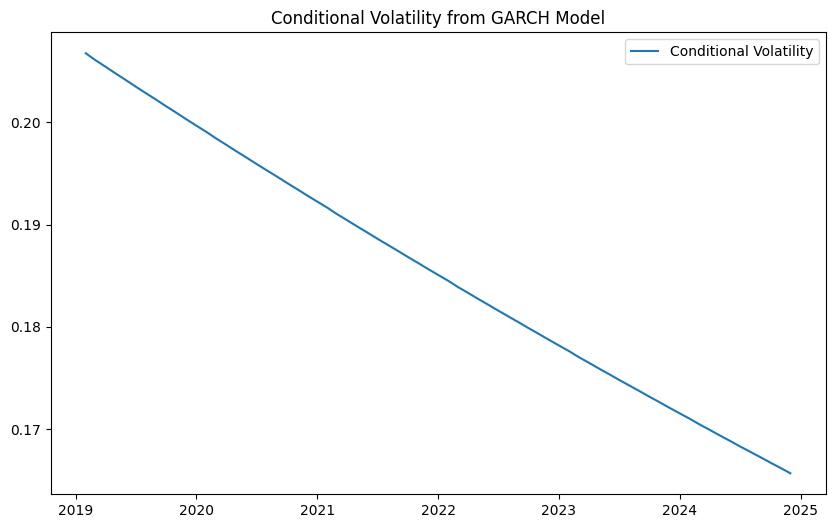

In [16]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data["Log_Close"] = data["Close"].apply(lambda x: np.log(x) if x > 0 else None)

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Differencing the log-transformed data to make it stationary
data_diff = data["Log_Close"].diff().dropna()

# Fit a simpler ARIMA model (p, d, q) = (0, 1, 1)
model = ARIMA(data_diff, order=(0, 1, 1))
results = model.fit()

# Print model summary
print("Simplified ARIMA Model Summary (Log-Transformed):")
print(results.summary())

# Forecasting future values
forecast_steps = 12  # Number of months to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Prepare forecast results
forecast_dates = pd.date_range(data_diff.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame({
    "Forecast": forecast_mean,
    "Lower Bound": forecast_conf_int.iloc[:, 0],
    "Upper Bound": forecast_conf_int.iloc[:, 1]
}, index=forecast_dates)

print("Forecasted Values:")
print(forecast_df)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data["Log_Close"], label="Log_Close (Historical)", color='blue')
plt.plot(forecast_df["Forecast"], label="Forecast", color='green')
plt.fill_between(forecast_df.index, forecast_df["Lower Bound"], forecast_df["Upper Bound"], color='gray', alpha=0.3)
plt.title("Log-Transformed Close Price Forecast")
plt.xlabel("Date")
plt.ylabel("Log Close")
plt.legend()
plt.show()

# Plot residuals to check for autocorrelation
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Simplified ARIMA Model (Log-Transformed)")
plt.legend()
plt.show()

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results (Log-Transformed):")
print(ljung_box)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, title="ACF of Residuals (Log-Transformed)")
plt.show()

# Fit a GARCH model to check for heteroskedasticity
garch_model = arch_model(residuals, vol="Garch", p=1, q=1)
garch_results = garch_model.fit()

# Print GARCH model summary
print("GARCH Model Summary:")
print(garch_results.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_results.conditional_volatility, label="Conditional Volatility")
plt.title("Conditional Volatility from GARCH Model")
plt.legend()
plt.show()


In [7]:
# Download Gold Prices (GC=F)
print("Downloading data for Gold Futures (GC=F)...")
gold_data = yf.download("GC=F", start=start_date, end=end_date, interval="1mo")
gold_data.reset_index(inplace=True)

# Keep only relevant columns
gold_data = gold_data[["Date", "Close"]]
gold_data.rename(columns={"Close": "Gold_Close"}, inplace=True)
gold_data.set_index("Date", inplace=True)

# Remove rows with NaN or zero values before applying log transformation
gold_data = gold_data[gold_data["Gold_Close"] > 0]  # Ensures valid values only

# Apply log transformation to stabilize variance
gold_data["Log_Gold_Close"] = np.log(gold_data["Gold_Close"])

# Drop rows with NA values caused by log transformation
gold_data = gold_data.dropna()

# Check for remaining NaN values
if gold_data["Log_Gold_Close"].isna().any():
    print("Warning: Some rows still contain NaNs in Gold data.")


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv


MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [11]:
print("Gold Data after Log Transformation:")
print(gold_data.head())
print("Columns in Gold Data:", gold_data.columns)


Gold Data after Log Transformation:
Price        Gold_Close Log_Gold_Close
Ticker             GC=F               
Date                                  
2019-01-01  1319.699951       7.185160
2019-02-01  1312.800049       7.179918
2019-03-01  1293.000000       7.164720
2019-04-01  1282.800049       7.156801
2019-05-01  1305.800049       7.174571
Columns in Gold Data: MultiIndex([(    'Gold_Close', 'GC=F'),
            ('Log_Gold_Close',     '')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv



[*********************100%***********************]  1 of 1 completed


Combined Bitcoin and Gold Data:
Price             Close  Log_Close  Log_Gold_Close
Date                                              
2019-01-01  3457.792725   8.148386        7.185160
2019-02-01  3854.785400   8.257071        7.179918
2019-03-01  4105.404297   8.320060        7.164720
2019-04-01  5350.726562   8.584988        7.156801
2019-05-01  8574.501953   9.056548        7.174571
Combined data saved to bitcoin_gold_combined_data_2019_2024.csv


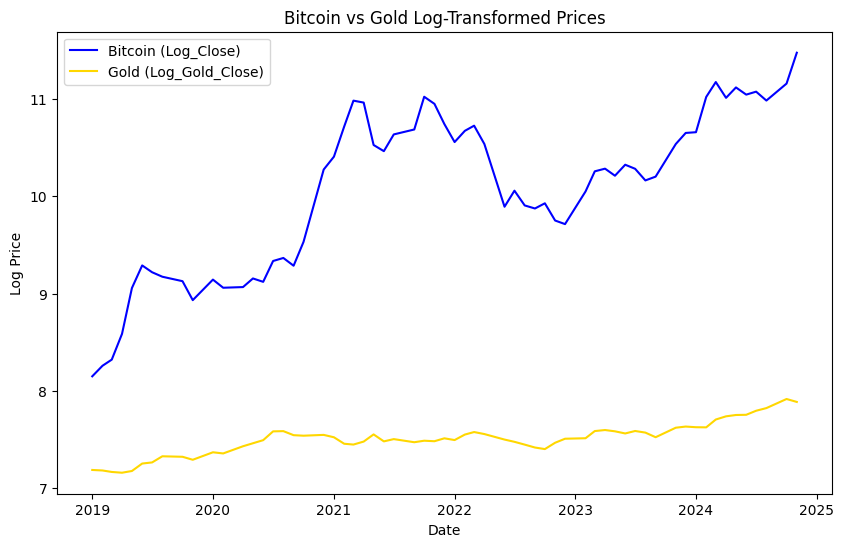

Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):
Price           Log_Close  Log_Gold_Close
Price                                    
Log_Close        1.000000        0.797333
Log_Gold_Close   0.797333        1.000000
Fitting GARCH model to Gold Log Prices...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00167. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2825.2905066329267
Iteration:      2,   Func. Count:     16,   Neg. LLF: 28.810819192591254
Iteration:      3,   Func. Count:     24,   Neg. LLF: -108.49083776360747
Iteration:      4,   Func. Count:     29,   Neg. LLF: -108.52956753884534
Iteration:      5,   Func. Count:     34,   Neg. LLF: -108.4965171914091
Iteration:      6,   Func. Count:     41,   Neg. LLF: -106.14700262263909
Iteration:      7,   Func. Count:     47,   Neg. LLF: -107.84180927305776
Iteration:      8,   Func. Count:     53,   Neg. LLF: -108.39855476944182
Iteration:      9,   Func. Count:     59,   Neg. LLF: -108.53081911565647
Iteration:     10,   Func. Count:     65,   Neg. LLF: -108.54431619734687
Iteration:     11,   Func. Count:     71,   Neg. LLF: -108.54486783173674
Iteration:     12,   Func. Count:     77,   Neg. LLF: -108.54487272030566
Optimization terminated successfully    (Exit mode 0)
            Current function value: -108.54487510144875
     

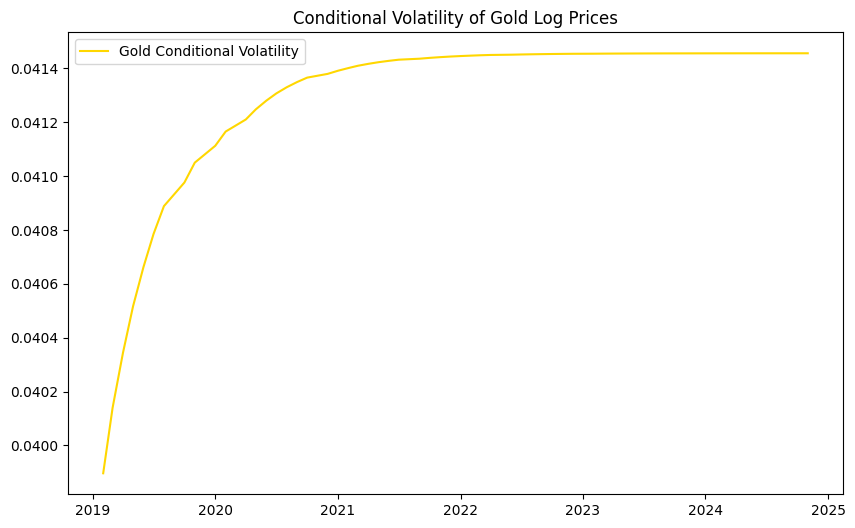

In [15]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data = data[data["Close"] > 0]  # Filter positive values
data["Log_Close"] = np.log(data["Close"])

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Download Gold Prices (GC=F)
print("Downloading data for Gold Futures (GC=F)...")
gold_data = yf.download("GC=F", start=start_date, end=end_date, interval="1mo")
gold_data.reset_index(inplace=True)

# Ensure `gold_data` columns are single-level
if isinstance(gold_data.columns, pd.MultiIndex):
    gold_data.columns = gold_data.columns.get_level_values(0)  # Flatten to single-level

# Keep only relevant columns
gold_data = gold_data[["Date", "Close"]]
gold_data.rename(columns={"Close": "Gold_Close"}, inplace=True)
gold_data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
gold_data = gold_data[gold_data["Gold_Close"] > 0]  # Filter positive values
gold_data["Log_Gold_Close"] = np.log(gold_data["Gold_Close"])

# Drop rows with NA values caused by log transformation
gold_data = gold_data.dropna()

# Merge Bitcoin and Gold Data
combined_data = pd.merge(
    data,
    gold_data[["Log_Gold_Close"]],
    left_index=True,
    right_index=True,
    how="inner"
)

# Display combined data
print("Combined Bitcoin and Gold Data:")
print(combined_data.head())

# Save combined data to a CSV file
combined_output_file = "bitcoin_gold_combined_data_2019_2024.csv"
combined_data.to_csv(combined_output_file)
print(f"Combined data saved to {combined_output_file}")

# Plot Bitcoin vs Gold Log Prices
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Close"], label="Bitcoin (Log_Close)", color='blue')
plt.plot(combined_data.index, combined_data["Log_Gold_Close"], label="Gold (Log_Gold_Close)", color='gold')
plt.title("Bitcoin vs Gold Log-Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()

# Calculate Correlation
correlation = combined_data[["Log_Close", "Log_Gold_Close"]].corr()
print("Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):")
print(correlation)

# Compare Volatility using GARCH for Gold
print("Fitting GARCH model to Gold Log Prices...")
gold_garch_model = arch_model(combined_data["Log_Gold_Close"].diff().dropna(), vol="Garch", p=1, q=1)
gold_garch_results = gold_garch_model.fit()

# Print GARCH model summary for Gold
print("GARCH Model Summary for Gold:")
print(gold_garch_results.summary())

# Plot Conditional Volatility for Gold
plt.figure(figsize=(10, 6))
plt.plot(gold_garch_results.conditional_volatility, label="Gold Conditional Volatility", color='gold')
plt.title("Conditional Volatility of Gold Log Prices")
plt.legend()
plt.show()


Fitting GARCH model to rescaled Bitcoin Log Returns...
Iteration:      1,   Func. Count:      6,   Neg. LLF: 186.60473199214843
Iteration:      2,   Func. Count:     13,   Neg. LLF: 132.75496753066815
Iteration:      3,   Func. Count:     18,   Neg. LLF: 132.75119206538648
Iteration:      4,   Func. Count:     23,   Neg. LLF: 132.75082507804518
Iteration:      5,   Func. Count:     28,   Neg. LLF: 132.750816374739
Iteration:      6,   Func. Count:     33,   Neg. LLF: 132.75077384433325
Iteration:      7,   Func. Count:     38,   Neg. LLF: 132.7506848394906
Iteration:      8,   Func. Count:     43,   Neg. LLF: 132.75046245286075
Iteration:      9,   Func. Count:     48,   Neg. LLF: 132.74982618656784
Iteration:     10,   Func. Count:     53,   Neg. LLF: 132.80531862662124
Iteration:     11,   Func. Count:     59,   Neg. LLF: 132.8344634186695
Iteration:     12,   Func. Count:     65,   Neg. LLF: 132.84153802624056
Iteration:     13,   Func. Count:     71,   Neg. LLF: 132.75769604927638


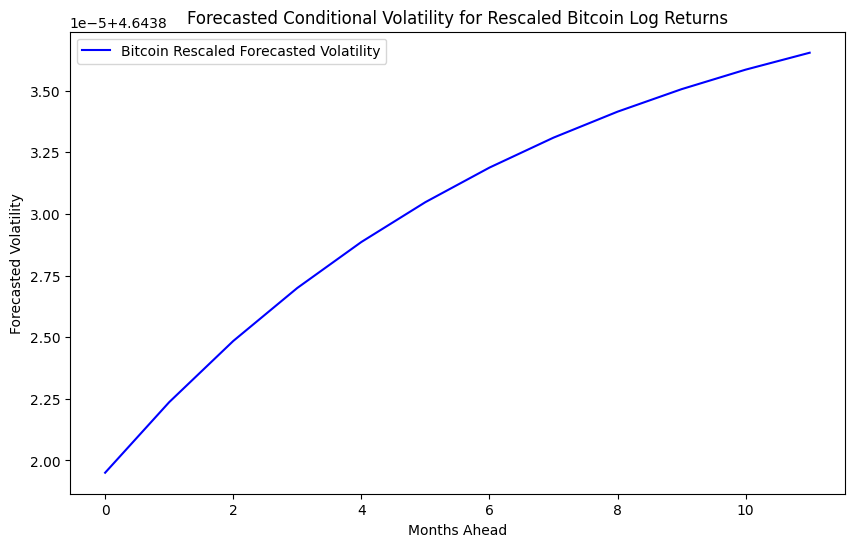

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Log_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -132.744
Distribution:                  Normal   AIC:                           273.488
Method:            Maximum Likelihood   BIC:                           281.931
                                        No. Observations:                   61
Date:                Mon, Dec 16 2024   Df Residuals:                       60
Time:                        19:24:18   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.5476      0.276      1.984  4.729e-02 [6.559e-0

In [17]:
# Rescale Bitcoin log returns
btc_log_returns = combined_data["Log_Close"].diff().dropna() * 10  # Rescale by 10

# Fit GARCH model to rescaled Bitcoin log returns
print("Fitting GARCH model to rescaled Bitcoin Log Returns...")
btc_garch_model = arch_model(btc_log_returns, vol="Garch", p=1, q=1)
btc_garch_results = btc_garch_model.fit()

# Forecast Volatility
forecast_steps = 12
btc_forecast = btc_garch_results.forecast(horizon=forecast_steps)

# Plot Forecasted Conditional Volatility
plt.figure(figsize=(10, 6))
plt.plot(btc_forecast.variance.values[-1], label="Bitcoin Rescaled Forecasted Volatility", color='blue')
plt.title("Forecasted Conditional Volatility for Rescaled Bitcoin Log Returns")
plt.xlabel("Months Ahead")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.show()

# Print Summary
print(btc_garch_results.summary())



Residual Analysis for Bitcoin GARCH Model...


<Figure size 1000x600 with 0 Axes>

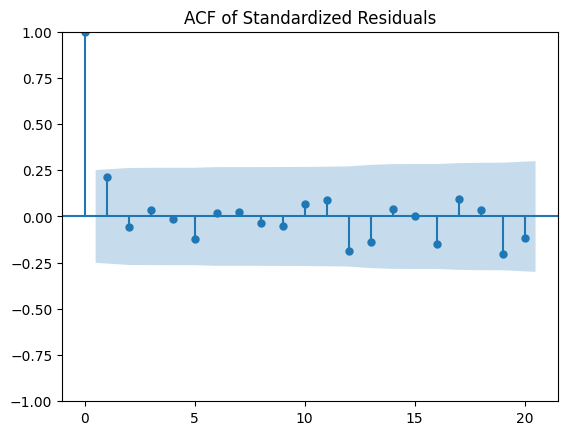

Ljung-Box Test Results (Bitcoin GARCH Residuals):
     lb_stat  lb_pvalue
10  5.027598   0.889327


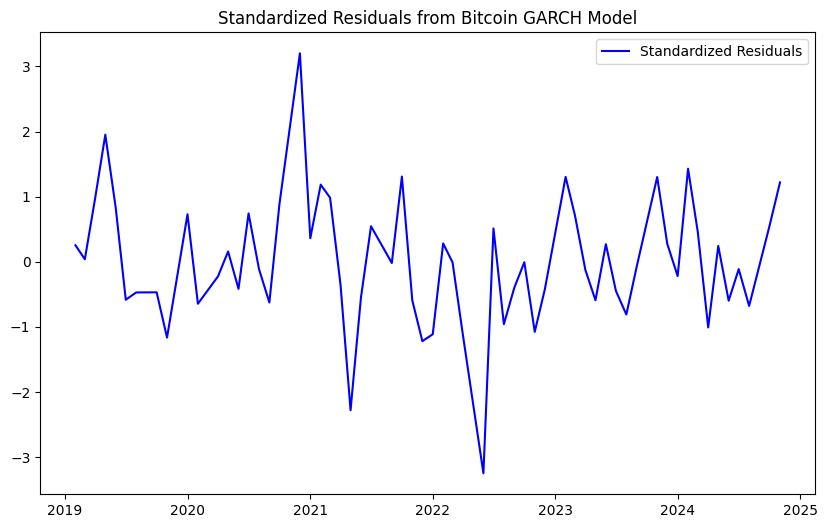

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Residual Analysis for Bitcoin GARCH Model
print("\nResidual Analysis for Bitcoin GARCH Model...")
btc_log_returns = combined_data["Log_Close"].diff().dropna() * 10  # Rescaled log returns
btc_garch_model = arch_model(btc_log_returns, vol="Garch", p=1, q=1)
btc_garch_results = btc_garch_model.fit(disp="off")

# Extract standardized residuals
standardized_residuals = btc_garch_results.resid / btc_garch_results.conditional_volatility

# Plot ACF of Residuals
plt.figure(figsize=(10, 6))
plot_acf(standardized_residuals, lags=20, title="ACF of Standardized Residuals")
plt.show()

# Ljung-Box Test for Autocorrelation
lb_test = acorr_ljungbox(standardized_residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results (Bitcoin GARCH Residuals):")
print(lb_test)

# Check if residuals exhibit remaining volatility clustering
plt.figure(figsize=(10, 6))
plt.plot(standardized_residuals, label="Standardized Residuals", color='blue')
plt.title("Standardized Residuals from Bitcoin GARCH Model")
plt.legend()
plt.show()



Forecasting Bitcoin Log Prices using ARIMA...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

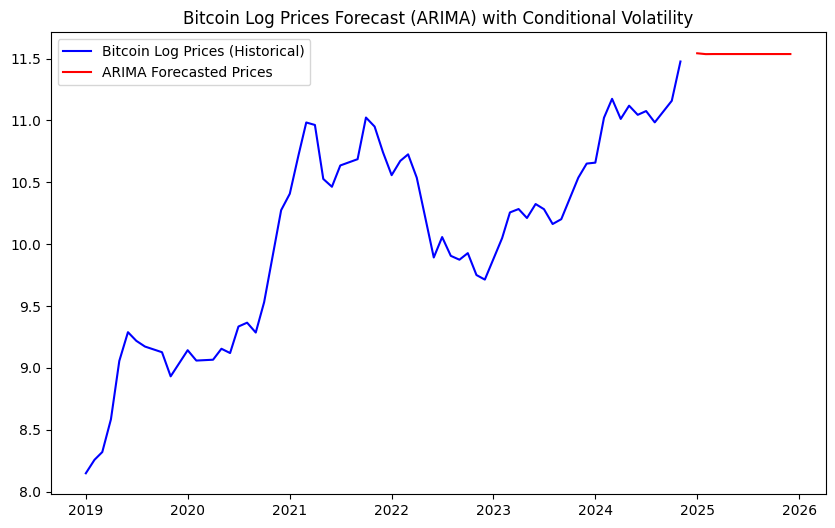


Forecasted Bitcoin Log Prices:
62    11.543283
63    11.536421
64    11.537129
65    11.537056
66    11.537064
67    11.537063
68    11.537063
69    11.537063
70    11.537063
71    11.537063
72    11.537063
73    11.537063
Name: predicted_mean, dtype: float64


In [19]:
# ARIMA Forecasting for Bitcoin Log Prices
print("\nForecasting Bitcoin Log Prices using ARIMA...")
model_arima = ARIMA(combined_data["Log_Close"], order=(1, 1, 1))  # ARIMA(1,1,1)
arima_results = model_arima.fit()

# Forecast next 12 months
forecast_steps = 12
arima_forecast = arima_results.forecast(steps=forecast_steps)

# Forecasted Volatility from GARCH
garch_forecast = btc_garch_results.forecast(horizon=forecast_steps).variance.iloc[-1]

# Plot Forecasted Prices and Volatility
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Close"], label="Bitcoin Log Prices (Historical)", color='blue')
plt.plot(pd.date_range(combined_data.index[-1], periods=forecast_steps+1, freq='M')[1:], arima_forecast,
         label="ARIMA Forecasted Prices", color='red')
plt.title("Bitcoin Log Prices Forecast (ARIMA) with Conditional Volatility")
plt.legend()
plt.show()

print("\nForecasted Bitcoin Log Prices:")
print(arima_forecast)


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_17036\3416173011.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(combined_data.index[-1], periods=forecast_steps+1, freq='M')[1:]


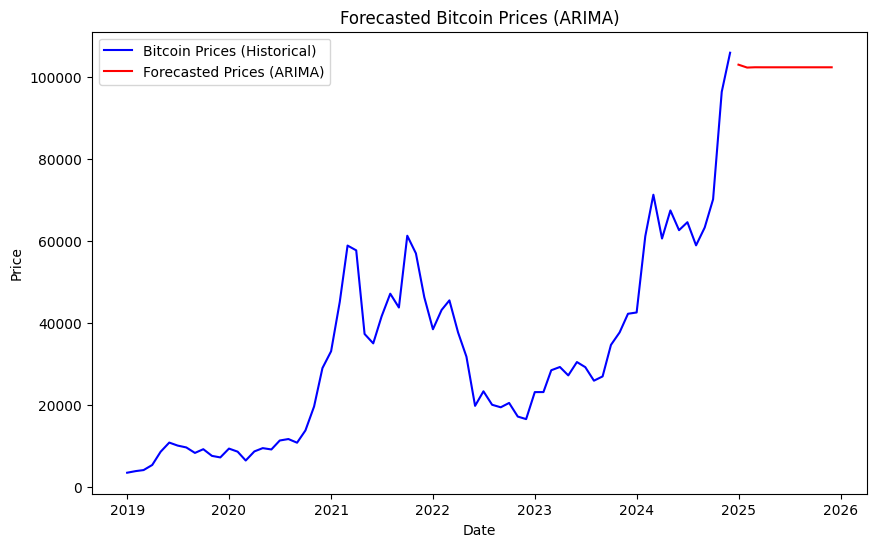

Forecasted Bitcoin Prices:
         Date  Forecasted_Close
62 2024-12-31     103082.315789
63 2025-01-31     102377.414655
64 2025-02-28     102449.911365
65 2025-03-31     102442.429957
66 2025-04-30     102443.201742
67 2025-05-31     102443.122121
68 2025-06-30     102443.130335
69 2025-07-31     102443.129488
70 2025-08-31     102443.129575
71 2025-09-30     102443.129566
72 2025-10-31     102443.129567
73 2025-11-30     102443.129567


In [20]:
# Back-transform ARIMA forecast to original price scale
forecast_steps = 12  # Forecast for 12 months
arima_forecast = arima_results.get_forecast(steps=forecast_steps).predicted_mean
forecast_dates = pd.date_range(combined_data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Convert log-transformed forecast back to original scale
forecast_prices = np.exp(arima_forecast)

# Plot forecasted prices on original scale
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close"], label="Bitcoin Prices (Historical)", color="blue")
plt.plot(forecast_dates, forecast_prices, label="Forecasted Prices (ARIMA)", color="red")
plt.title("Forecasted Bitcoin Prices (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Display forecasted prices
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted_Close": forecast_prices})
print("Forecasted Bitcoin Prices:")
print(forecast_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv
Combined Bitcoin and Gold Data:
Price             Close  Log_Close  Log_Gold_Close
Date                                              
2019-01-01  3457.792725   8.148386        7.185160
2019-02-01  3854.785400   8.257071        7.179918
2019-03-01  4105.404297   8.320060        7.164720
2019-04-01  5350.726562   8.584988        7.156801
2019-05-01  8574.501953   9.056548        7.174571
Combined data saved to bitcoin_gold_combined_data_2019_2024.csv


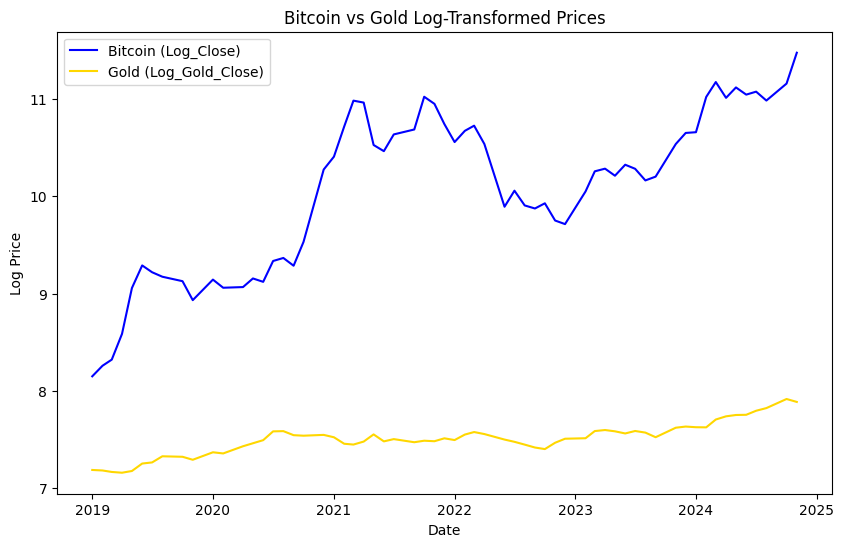

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00167. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):
Price           Log_Close  Log_Gold_Close
Price                                    
Log_Close        1.000000        0.797333
Log_Gold_Close   0.797333        1.000000
Fitting GARCH model to Gold Log Prices...
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2825.2905066329267
Iteration:      2,   Func. Count:     16,   Neg. LLF: 28.810819192591254
Iteration:      3,   Func. Count:     24,   Neg. LLF: -108.49083776360747
Iteration:      4,   Func. Count:     29,   Neg. LLF: -108.52956753884534
Iteration:      5,   Func. Count:     34,   Neg. LLF: -108.4965171914091
Iteration:      6,   Func. Count:     41,   Neg. LLF: -106.14700262263909
Iteration:      7,   Func. Count:     47,   Neg. LLF: -107.84180927305776
Iteration:      8,   Func. Count:     53,   Neg. LLF: -108.39855476944182
Iteration:      9,   Func. Count:     59,   Neg. LLF: -108.53081911565647
Iteration:     10,   Func. Count:     65,   Neg. LLF: -108.5

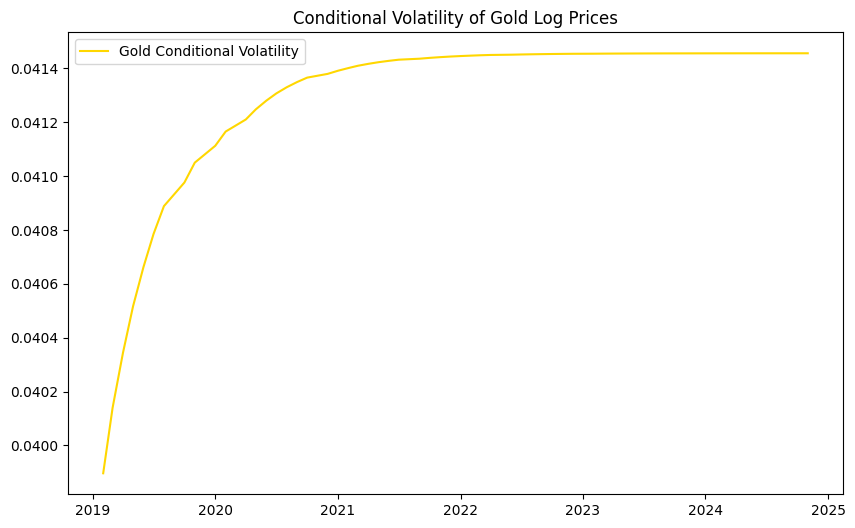

Forecasting Gold Log Prices using ARIMA...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

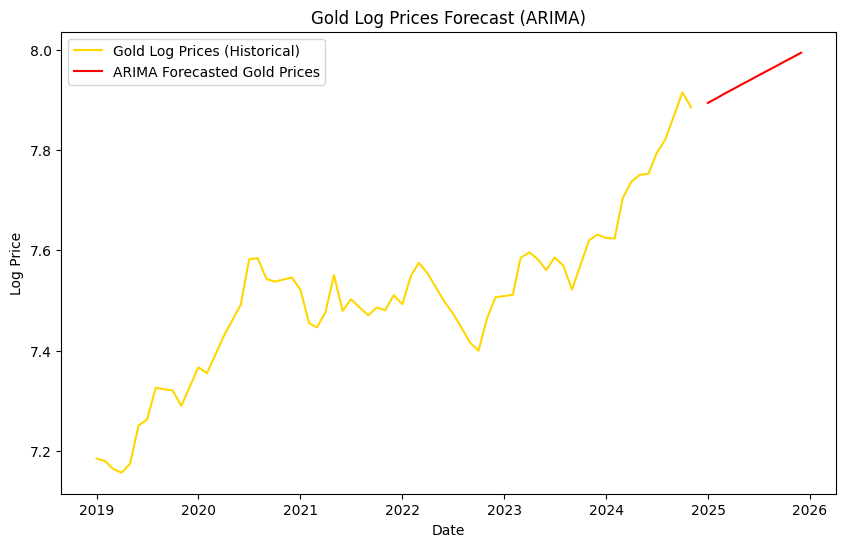

Forecasting Conditional Volatility for Gold using GARCH...


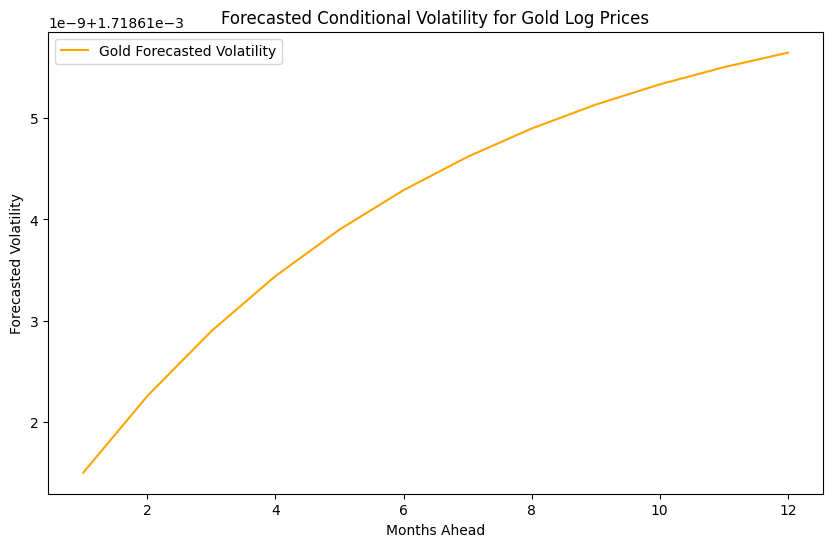

Gold Price and Volatility Forecasting Complete.


In [23]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data = data[data["Close"] > 0]  # Filter positive values
data["Log_Close"] = np.log(data["Close"])

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Download Gold Prices (GC=F)
print("Downloading data for Gold Futures (GC=F)...")
gold_data = yf.download("GC=F", start=start_date, end=end_date, interval="1mo")
gold_data.reset_index(inplace=True)

# Ensure `gold_data` columns are single-level
if isinstance(gold_data.columns, pd.MultiIndex):
    gold_data.columns = gold_data.columns.get_level_values(0)  # Flatten to single-level

# Keep only relevant columns
gold_data = gold_data[["Date", "Close"]]
gold_data.rename(columns={"Close": "Gold_Close"}, inplace=True)
gold_data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
gold_data = gold_data[gold_data["Gold_Close"] > 0]  # Filter positive values
gold_data["Log_Gold_Close"] = np.log(gold_data["Gold_Close"])

# Drop rows with NA values caused by log transformation
gold_data = gold_data.dropna()

# Merge Bitcoin and Gold Data
combined_data = pd.merge(
    data,
    gold_data[["Log_Gold_Close"]],
    left_index=True,
    right_index=True,
    how="inner"
)

# Display combined data
print("Combined Bitcoin and Gold Data:")
print(combined_data.head())

# Save combined data to a CSV file
combined_output_file = "bitcoin_gold_combined_data_2019_2024.csv"
combined_data.to_csv(combined_output_file)
print(f"Combined data saved to {combined_output_file}")

# Plot Bitcoin vs Gold Log Prices
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Close"], label="Bitcoin (Log_Close)", color='blue')
plt.plot(combined_data.index, combined_data["Log_Gold_Close"], label="Gold (Log_Gold_Close)", color='gold')
plt.title("Bitcoin vs Gold Log-Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()

# Calculate Correlation
correlation = combined_data[["Log_Close", "Log_Gold_Close"]].corr()
print("Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):")
print(correlation)

# Compare Volatility using GARCH for Gold
print("Fitting GARCH model to Gold Log Prices...")
gold_garch_model = arch_model(combined_data["Log_Gold_Close"].diff().dropna(), vol="Garch", p=1, q=1)
gold_garch_results = gold_garch_model.fit()

# Print GARCH model summary for Gold
print("GARCH Model Summary for Gold:")
print(gold_garch_results.summary())

# Plot Conditional Volatility for Gold
plt.figure(figsize=(10, 6))
plt.plot(gold_garch_results.conditional_volatility, label="Gold Conditional Volatility", color='gold')
plt.title("Conditional Volatility of Gold Log Prices")
plt.legend()
plt.show()

# Forecast Gold Prices using ARIMA
print("Forecasting Gold Log Prices using ARIMA...")
gold_arima_model = ARIMA(combined_data["Log_Gold_Close"], order=(1, 1, 1))
gold_arima_results = gold_arima_model.fit()

# Forecast Gold Prices
gold_forecast_steps = 12  # Forecasting 12 months into the future
gold_arima_forecast = gold_arima_results.forecast(steps=gold_forecast_steps)

# Plot Gold Price Forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Gold_Close"], label="Gold Log Prices (Historical)", color='gold')
forecast_dates = pd.date_range(combined_data.index[-1], periods=gold_forecast_steps+1, freq='M')[1:]
plt.plot(forecast_dates, gold_arima_forecast, label="ARIMA Forecasted Gold Prices", color='red')
plt.title("Gold Log Prices Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()

# Forecast Conditional Volatility for Gold
print("Forecasting Conditional Volatility for Gold using GARCH...")
gold_forecast_vol = gold_garch_results.forecast(horizon=gold_forecast_steps).variance.iloc[-1]

# Plot Conditional Volatility Forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, gold_forecast_steps+1), gold_forecast_vol.values, label="Gold Forecasted Volatility", color='orange')
plt.title("Forecasted Conditional Volatility for Gold Log Prices")
plt.xlabel("Months Ahead")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.show()

print("Gold Price and Volatility Forecasting Complete.")


[*********************100%***********************]  1 of 1 completed

Headers for Bitcoin: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Preview of the log-transformed data:
Price             Close  Log_Close
Date                              
2019-01-01  3457.792725   8.148386
2019-02-01  3854.785400   8.257071
2019-03-01  4105.404297   8.320060
2019-04-01  5350.726562   8.584988
2019-05-01  8574.501953   9.056548
Log-transformed data for Bitcoin saved to bitcoin_log_transformed_data_2019_2024.csv



[*********************100%***********************]  1 of 1 completed


Combined Bitcoin and Gold Data:
Price             Close  Log_Close  Log_Gold_Close
Date                                              
2019-01-01  3457.792725   8.148386        7.185160
2019-02-01  3854.785400   8.257071        7.179918
2019-03-01  4105.404297   8.320060        7.164720
2019-04-01  5350.726562   8.584988        7.156801
2019-05-01  8574.501953   9.056548        7.174571
Combined data saved to bitcoin_gold_combined_data_2019_2024.csv


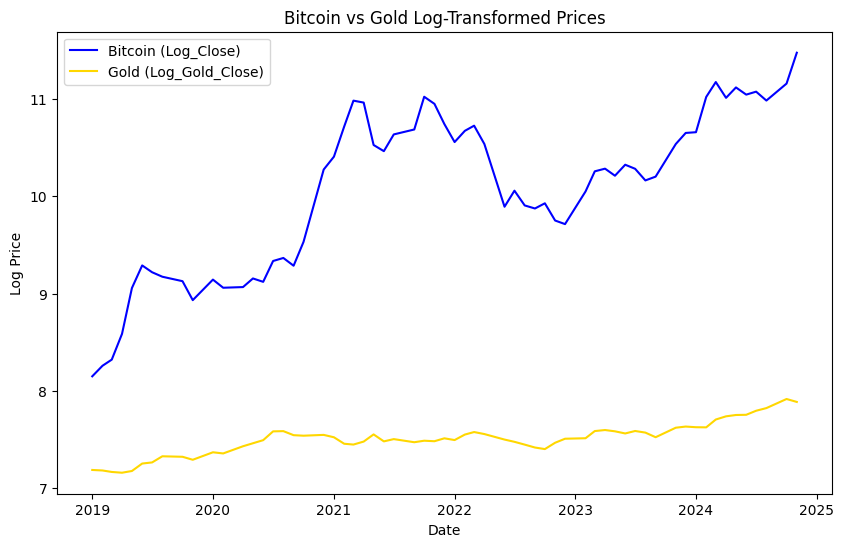

Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):
Price           Log_Close  Log_Gold_Close
Price                                    
Log_Close        1.000000        0.797333
Log_Gold_Close   0.797333        1.000000
Fitting GARCH model to Gold Log Prices...
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2825.2905066329267
Iteration:      2,   Func. Count:     16,   Neg. LLF: 28.810819192591254
Iteration:      3,   Func. Count:     24,   Neg. LLF: -108.49083776360747
Iteration:      4,   Func. Count:     29,   Neg. LLF: -108.52956753884534
Iteration:      5,   Func. Count:     34,   Neg. LLF: -108.4965171914091
Iteration:      6,   Func. Count:     41,   Neg. LLF: -106.14700262263909
Iteration:      7,   Func. Count:     47,   Neg. LLF: -107.84180927305776
Iteration:      8,   Func. Count:     53,   Neg. LLF: -108.39855476944182
Iteration:      9,   Func. Count:     59,   Neg. LLF: -108.53081911565647
Iteration:     10,   Func. Count:     65,   Neg. LLF: -108.5

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00167. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


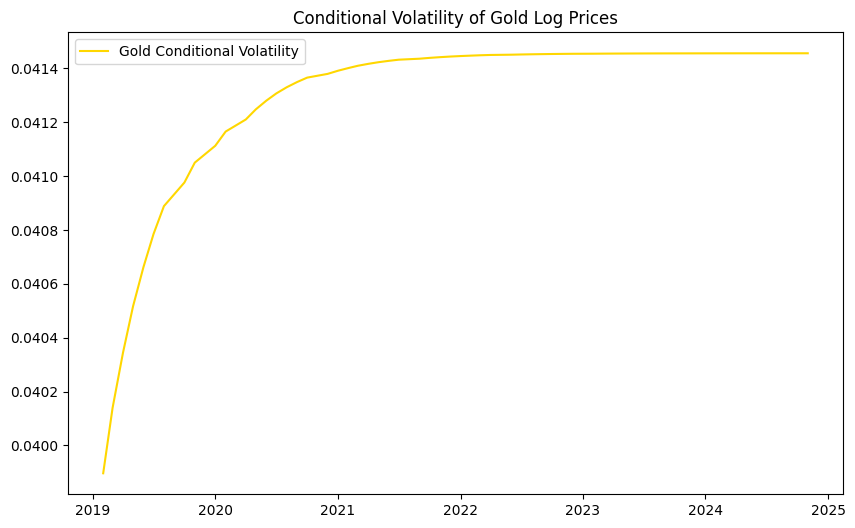

Forecasting Gold Log Prices using ARIMA...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

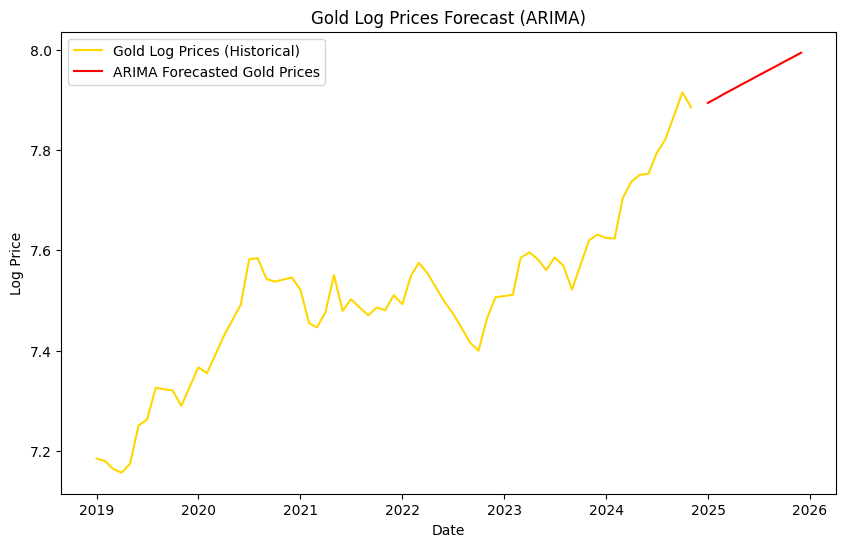

Forecasting Conditional Volatility for Gold using GARCH...


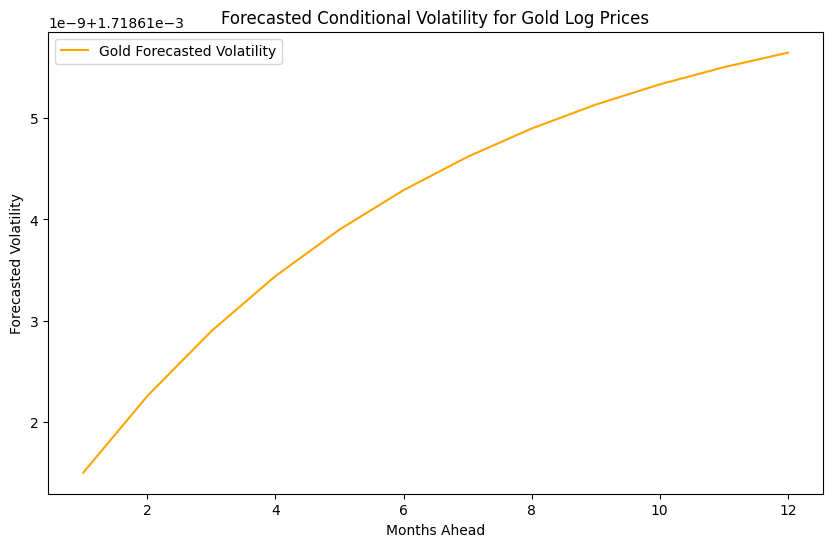

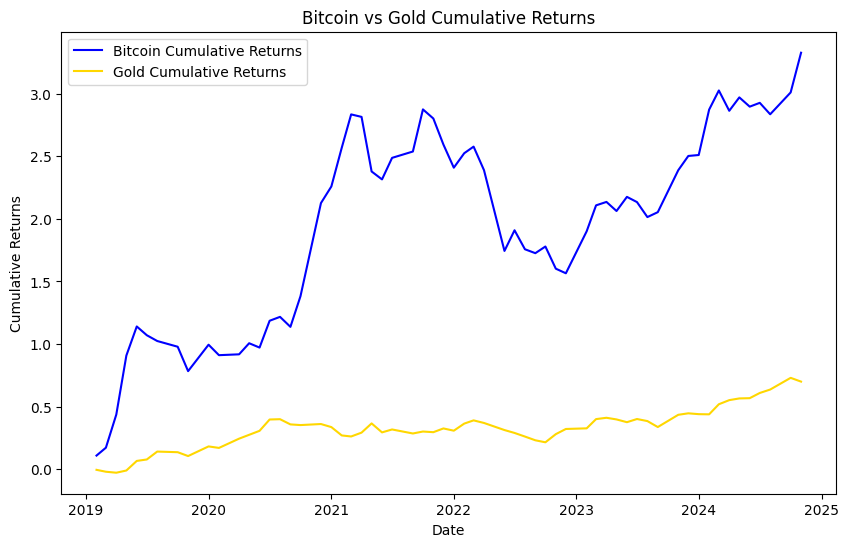

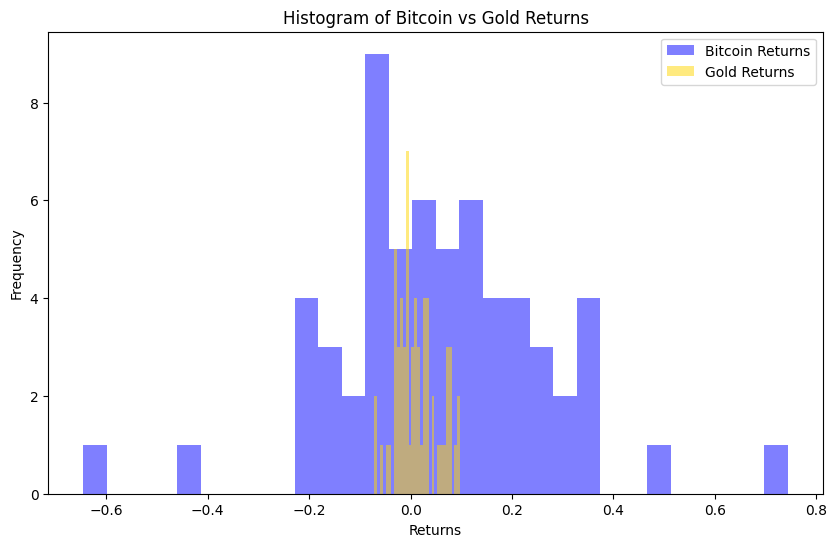

Gold Price and Volatility Forecasting Complete. Comparison of returns complete.


In [24]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Define the cryptocurrency and its Yahoo Finance ticker
ticker = 'BTC-USD'
name = 'Bitcoin'

# Define the date range
start_date = "2019-01-01"
end_date = "2024-12-31"

# Download data for Bitcoin
print(f"Downloading data for {name} ({ticker})...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
data.reset_index(inplace=True)

# Flatten MultiIndex columns if present
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Flatten to single-level

print(f"Headers for {name}: {list(data.columns)}")

# Keep only relevant columns
data = data[["Date", "Close"]]  # Select required columns

# Set 'Date' as the index for time series analysis
data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
data = data[data["Close"] > 0]  # Filter positive values
data["Log_Close"] = np.log(data["Close"])

# Drop rows with NA values caused by log transformation
data = data.dropna()

# Display the first few rows of the log-transformed data
print("Preview of the log-transformed data:")
print(data.head())

# Save to a CSV file
output_file = f"{name.lower()}_log_transformed_data_2019_2024.csv"
data.to_csv(output_file)
print(f"Log-transformed data for {name} saved to {output_file}")

# Download Gold Prices (GC=F)
print("Downloading data for Gold Futures (GC=F)...")
gold_data = yf.download("GC=F", start=start_date, end=end_date, interval="1mo")
gold_data.reset_index(inplace=True)

# Ensure `gold_data` columns are single-level
if isinstance(gold_data.columns, pd.MultiIndex):
    gold_data.columns = gold_data.columns.get_level_values(0)  # Flatten to single-level

# Keep only relevant columns
gold_data = gold_data[["Date", "Close"]]
gold_data.rename(columns={"Close": "Gold_Close"}, inplace=True)
gold_data.set_index("Date", inplace=True)

# Apply log transformation to stabilize variance
gold_data = gold_data[gold_data["Gold_Close"] > 0]  # Filter positive values
gold_data["Log_Gold_Close"] = np.log(gold_data["Gold_Close"])

# Drop rows with NA values caused by log transformation
gold_data = gold_data.dropna()

# Merge Bitcoin and Gold Data
combined_data = pd.merge(
    data,
    gold_data[["Log_Gold_Close"]],
    left_index=True,
    right_index=True,
    how="inner"
)

# Display combined data
print("Combined Bitcoin and Gold Data:")
print(combined_data.head())

# Save combined data to a CSV file
combined_output_file = "bitcoin_gold_combined_data_2019_2024.csv"
combined_data.to_csv(combined_output_file)
print(f"Combined data saved to {combined_output_file}")

# Plot Bitcoin vs Gold Log Prices
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Close"], label="Bitcoin (Log_Close)", color='blue')
plt.plot(combined_data.index, combined_data["Log_Gold_Close"], label="Gold (Log_Gold_Close)", color='gold')
plt.title("Bitcoin vs Gold Log-Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()

# Calculate Correlation
correlation = combined_data[["Log_Close", "Log_Gold_Close"]].corr()
print("Correlation between Bitcoin (Log_Close) and Gold (Log_Gold_Close):")
print(correlation)

# Compare Volatility using GARCH for Gold
print("Fitting GARCH model to Gold Log Prices...")
gold_garch_model = arch_model(combined_data["Log_Gold_Close"].diff().dropna(), vol="Garch", p=1, q=1)
gold_garch_results = gold_garch_model.fit()

# Print GARCH model summary for Gold
print("GARCH Model Summary for Gold:")
print(gold_garch_results.summary())

# Plot Conditional Volatility for Gold
plt.figure(figsize=(10, 6))
plt.plot(gold_garch_results.conditional_volatility, label="Gold Conditional Volatility", color='gold')
plt.title("Conditional Volatility of Gold Log Prices")
plt.legend()
plt.show()

# Forecast Gold Prices using ARIMA
print("Forecasting Gold Log Prices using ARIMA...")
gold_arima_model = ARIMA(combined_data["Log_Gold_Close"], order=(1, 1, 1))
gold_arima_results = gold_arima_model.fit()

# Forecast Gold Prices
gold_forecast_steps = 12  # Forecasting 12 months into the future
gold_arima_forecast = gold_arima_results.forecast(steps=gold_forecast_steps)

# Plot Gold Price Forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data["Log_Gold_Close"], label="Gold Log Prices (Historical)", color='gold')
forecast_dates = pd.date_range(combined_data.index[-1], periods=gold_forecast_steps+1, freq='M')[1:]
plt.plot(forecast_dates, gold_arima_forecast, label="ARIMA Forecasted Gold Prices", color='red')
plt.title("Gold Log Prices Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.show()

# Forecast Conditional Volatility for Gold
print("Forecasting Conditional Volatility for Gold using GARCH...")
gold_forecast_vol = gold_garch_results.forecast(horizon=gold_forecast_steps).variance.iloc[-1]

# Plot Conditional Volatility Forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, gold_forecast_steps+1), gold_forecast_vol.values.flatten(), label="Gold Forecasted Volatility", color='orange')
plt.title("Forecasted Conditional Volatility for Gold Log Prices")
plt.xlabel("Months Ahead")
plt.ylabel("Forecasted Volatility")
plt.legend()
plt.show()

# Compare Cumulative Returns for Bitcoin and Gold
combined_data['Bitcoin_Returns'] = combined_data['Log_Close'].diff()
combined_data['Gold_Returns'] = combined_data['Log_Gold_Close'].diff()

combined_data['Bitcoin_CumReturns'] = combined_data['Bitcoin_Returns'].cumsum()
combined_data['Gold_CumReturns'] = combined_data['Gold_Returns'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Bitcoin_CumReturns'], label='Bitcoin Cumulative Returns', color='blue')
plt.plot(combined_data.index, combined_data['Gold_CumReturns'], label='Gold Cumulative Returns', color='gold')
plt.title("Bitcoin vs Gold Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Histogram Comparison
plt.figure(figsize=(10, 6))
plt.hist(combined_data['Bitcoin_Returns'].dropna(), bins=30, alpha=0.5, label='Bitcoin Returns', color='blue')
plt.hist(combined_data['Gold_Returns'].dropna(), bins=30, alpha=0.5, label='Gold Returns', color='gold')
plt.title("Histogram of Bitcoin vs Gold Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Gold Price and Volatility Forecasting Complete. Comparison of returns complete.")


[*********************100%***********************]  2 of 2 completed


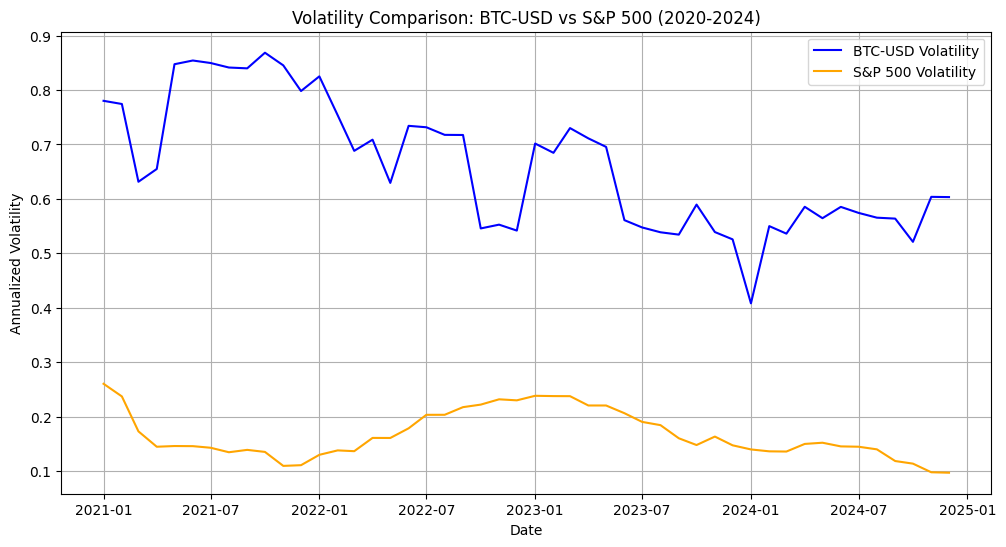

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers and date range
tickers = ['BTC-USD', '^GSPC']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download data for both Bitcoin and S&P 500
data = yf.download(tickers, start=start_date, end=end_date, interval="1mo", group_by="ticker")

# Prepare data for Bitcoin
btc_data = data['BTC-USD']['Close'].dropna()
btc_data.name = "BTC-USD"
btc_volatility = btc_data.pct_change().rolling(window=12).std() * (12**0.5)

# Prepare data for S&P 500
sp500_data = data['^GSPC']['Close'].dropna()
sp500_data.name = "S&P 500"
sp500_volatility = sp500_data.pct_change().rolling(window=12).std() * (12**0.5)

# Combine volatilities into a single DataFrame
volatility_data = pd.DataFrame({'BTC-USD Volatility': btc_volatility, 'S&P 500 Volatility': sp500_volatility})

# Plot the volatility comparison
plt.figure(figsize=(12, 6))
plt.plot(volatility_data.index, volatility_data['BTC-USD Volatility'], label='BTC-USD Volatility', color='blue')
plt.plot(volatility_data.index, volatility_data['S&P 500 Volatility'], label='S&P 500 Volatility', color='orange')
plt.title('Volatility Comparison: BTC-USD vs S&P 500 (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid()
plt.show()
